# Opx-Cpx Matching 
- This example shows how to calculate all possible matches for Cpxs and Opxs, where there aren't clear touching pairs.
- E.g., inputting all measured Cpxs from a lava sample, all measured Opxs, and wanting to assess which ones are in equilibrium. This is adapted from the method of Neave et al. (2017) used to assess all possible Cpx-Liq pairs
- Say you input Opx compositions you have measured on the probe in one sheet of an excel spreadsheet, and a set of Cpx compositions in another sheet
- You can download the spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Two_Pyroxene_Thermobarometry/Two_pyroxene_input.xlsx

You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

In [2]:
# Loading python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## Setting pretty plot parameters

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Load in Opx compositions

In [4]:
out_opxsheet=pt.import_excel('Two_pyroxene_input.xlsx', sheet_name="Opx")
Opxs2=out_opxsheet['Opxs']

## Load in Cpx compositions

In [5]:
out_cpxsheet=pt.import_excel('Two_pyroxene_input.xlsx', sheet_name="Cpx")
Cpxs2=out_cpxsheet['Cpxs']

In [6]:
#  Inspect your inputs to check they have been read in properly
display(Opxs2.head())
display(Cpxs2.head())

,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Sample_ID_Opx
0,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0,0.19,your_opx_sample_name_1
1,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0,0.00,your_opx_sample_name_2
2,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0,0.02,your_opx_sample_name_3
3,55.15,0.17,1.19,10.21,0.22,29.99,1.66,0.03,0,0.15,your_opx_sample_name_4
4,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0,0.16,your_opx_sample_name_5


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0,0.58,your_cpx_sample_name_1
1,51.70,0.28,8.38,6.69,0.15,21.40,11.70,0.64,0,0.05,your_cpx_sample_name_2
2,51.50,0.45,8.10,6.96,0.17,20.30,12.60,0.56,0,0.09,your_cpx_sample_name_3
3,51.06,0.62,3.16,6.18,0.12,15.78,20.82,0.27,0,0.01,your_cpx_sample_name_4
4,53.32,0.48,2.25,5.92,0.15,16.91,20.73,0.28,0,0.12,your_cpx_sample_name_5


## Example 1 - Assesing all possible combinations
- The function "calculate_cpx_opx_press_temp_matching" first makes a dataframe which contains all possible Cpx-Opx combinations. This could be very large if you enter hundreds of compositions. This is fine, just be aware the calculations may take a few seconds.
- As with touching pairs calculation, you need to specify your opx_comps= and cpx_comps= 
- You then also need to specify an equationT and an equationP
- You then have various options to filter outputs. If you enter no other inuts, it will return pressures and temperatures for all Cpx-Opx matches. However, some of these are probably not in equilibrium
- The function also has an option to filter based on the KdFe-Mg equilibrium between Cpx and Opx. 
- If you enter Kd_Match="Subsolidus" it will only return pressures and temperatures for Cpx-Opx pairs which have Kd-Fe-Mg (Cpx-opx) within the 0.7+-0.2 suggested by Putirka
- If you enter Kd Match="HighTemp" it will only return pressures and temperatures for Cpx-Opx pairs which have Kd-Fe-Mg (cpx-opx) within the 1.09+-0.14 suggested by Putirka
- If you want more flexibility still, you can enter Kd_Match=, and Kd_Err=, which will accept all pairs with a Kd value of say Kd_Match, +-Kd_Err
- The function then returns a dictionary. Within this dictionary are 2 different types of outputs
- "Av_PTs_perCPX" - Averages the pressures and temperatures for all the matches for a given cpx (Similar to the method used for Cpx-Liq by Neave and Putirka (2017)
- "Av_PTs_perOPX" - Averages the pressures and temperatures for all the matches for a given opx (Similar to the method used for Cpx-Liq by Neave and Putirka (2017)
- "All_PTs" returns all matches which have passed the Kd filters (if any were specified)

### 1a - No filtering based on Kd
- Solve PT for all Cpx-Opx pairs, with no Kd filter using equation 39 of Putirka for P, and 36 for T
- The function returns a dictionary containing three dataframes. These have keys 'Av_PTs_perCPX', 'Av_PTs_perOPX', and 'All_PTs'
- Av_PTs_perCPX averages P and T for each Cpx (e.g., if Cpx1 matches Opx1, Opx5 and Opx 6, averages all those Ps and Ts, returns a signal number).
- Av_PTs_perOPX averages all matches per Cpx. 
- 'All_PTs' returns every Opx-Cpx pair, with no averaging. 

In [7]:
MatchOut=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36",
                                                 return_all_pairs=True)
# These lines split the dictionary into three dataframes
Av_Cpxs=MatchOut['Av_PTs_perCPX']
Av_Opxs=MatchOut['Av_PTs_perOPX']
All_matches=MatchOut['All_PTs']
All_matches.head()

Considering N=23 Cpx & N=19 Opx, which is a total of N=437 Cpx-Opx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Done!!! I found a total of N=437 Cpx-Opx matches using the specified filter. 
N=23 Cpx out of the N=23 Cpx that you input matched to 1 or more Opx
N=19 Opx out of the N=19 Opx that you input matched to 1 or more Cpx
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,T_K_calc,P_kbar_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Si_Opx_cat_6ox,Mg_Opx_cat_6ox,Fet_Opx_cat_6ox,Ca_Opx_cat_6ox,Al_Opx_cat_6ox,Na_Opx_cat_6ox,K_Opx_cat_6ox,Mn_Opx_cat_6ox,Ti_Opx_cat_6ox,Cr_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,En_Simple_MgFeCa_Opx,Fs_Simple_MgFeCa_Opx,Wo_Simple_MgFeCa_Opx,Cation_Sum_Opx,Ca_CaMgFe,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX
0,your_opx_sample_name_1,your_cpx_sample_name_1,0.834684,1258.526669,3.380885,0.0,0.0,T_Put2008_eq36,P_Put2008_eq39,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0.0,0.19,1.943665,1.617356,0.333959,0.034078,0.062475,0.000685,0.0,0.007184,0.009038,0.005308,0.0,0.056335,0.006140,1.952703,0.814628,0.168208,0.017164,4.013748,0.017164,0.442596,0.000685,0.009038,0.005308,0.000146,0.034078,0.957618,0.790815,0.028142,0.828850,0.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.017164,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0
1,your_opx_sample_name_2,your_cpx_sample_name_1,1.065157,1403.925666,13.493433,0.0,0.0,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,0.823640,0.133270,0.043089,4.012245,0.043089,0.442596,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.043089,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0
2,your_opx_sample_name_3,your_cpx_sample_name_1,1.019441,1397.201768,11.274875,0.0,0.0,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,0.814732,0.137741,0.047527,4.008433,0.047527,0.442596,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.047527,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0
3,your_opx_sample_name_4,your_cpx_sample_name_1,0.902429,1294.454439,4.601071,0.0,0.0,T_Put2008_eq36,P_Put2008_eq39,55.15,0.17,1.19,10.21,0.22,29.99,1.66,0.03,0.0,0.15,1.968730,1.595973,0.304805,0.063492,0.050066,0.002076,0.0,0.006652,0.004565,0.004233,0.0,0.031270,0.018796,1.973295,0.812502,0.155175,0.032324,4.000594,0.032324,0.442596,0.002076,0.004565,0.004233,0.012486,0.063492,0.913443,0.764291,0.053125,0.839637,3.0,52.3,0.7,3.0,5.1,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.9

In [8]:
Av_Cpxs.head()

,Sample_ID_Cpx,Mean_T_K_calc,Std_T_K_calc,Mean_P_kbar_calc,Std_P_kbar_calc,ID_CPX,Mean_Kd_Fe_Mg_Cpx_Opx,Mean_Delta_T_K_Iter,Mean_Delta_P_kbar_Iter,Mean_SiO2_Opx,Mean_TiO2_Opx,Mean_Al2O3_Opx,Mean_FeOt_Opx,Mean_MnO_Opx,Mean_MgO_Opx,Mean_CaO_Opx,Mean_Na2O_Opx,Mean_K2O_Opx,Mean_Cr2O3_Opx,Mean_Si_Opx_cat_6ox,Mean_Mg_Opx_cat_6ox,Mean_Fet_Opx_cat_6ox,Mean_Ca_Opx_cat_6ox,Mean_Al_Opx_cat_6ox,Mean_Na_Opx_cat_6ox,Mean_K_Opx_cat_6ox,Mean_Mn_Opx_cat_6ox,Mean_Ti_Opx_cat_6ox,Mean_Cr_Opx_cat_6ox,Mean_oxy_renorm_factor_opx,Mean_Al_IV_Opx_cat_6ox,Mean_Al_VI_Opx_cat_6ox,Mean_Si_Ti_Opx_cat_6ox,Mean_En_Simple_MgFeCa_Opx,Mean_Fs_Simple_MgFeCa_Opx,Mean_Wo_Simple_MgFeCa_Opx,Mean_Cation_Sum_Opx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_NaAlSi2O6,Mean_FmTiAlSiO6,Mean_CrAl2SiO6,Mean_FmAl2SiO6,Mean_CaFmSi2O6,Mean_Fm2Si2O6,Mean_En_Opx,Mean_Di_Opx,Mean_Mgno_OPX,Mean_ID_OPX,Mean_SiO2_Cpx,Mean_TiO2_Cpx,Mean_Al2O3_Cpx,Mean_FeOt_Cpx,Mean_MnO_Cpx,Mean_MgO_Cpx,Mean_CaO_Cpx,Mean_Na2O_Cpx,Mean_K2O_Cpx,Mean_Cr2O3_Cpx,Mean_Si_Cpx_cat_6ox,Mean_Mg_Cpx_cat_6ox,Mean_Fet_Cpx_cat_6ox,Mean_Ca_Cpx_cat_6ox,Mean_Al_Cpx_cat_6ox,Mean_Na_Cpx_cat_6ox,Mean_K_Cpx_cat_6ox,Mean_Mn_Cpx_cat_6ox,Mean_Ti_Cpx_cat_6ox,Mean_Cr_Cpx_cat_6ox,Mean_oxy_renorm_factor,Mean_Al_IV_cat_6ox,Mean_Al_VI_cat_6ox,Mean_En_Simple_MgFeCa_Cpx,Mean_Fs_Simple_MgFeCa_Cpx,Mean_Wo_Simple_MgFeCa_Cpx,Mean_Cation_Sum_Cpx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Lindley_Fe3_Cpx,Mean_Lindley_Fe2_Cpx,Mean_Lindley_Fe3_Cpx_prop,Mean_CrCaTs,Mean_a_cpx_En,Mean_Mgno_Cpx,Mean_Jd,"Mean_Jd_from 0=Na, 1=Al",Mean_CaTs,Mean_CaTi,Mean_DiHd_1996,Mean_EnFs,Mean_DiHd_2003,Mean_Di_Cpx,Mean_FeIII_Wang21,Mean_FeII_Wang21,Std_Kd_Fe_Mg_Cpx_Opx,Std_Delta_T_K_Iter,Std_Delta_P_kbar_Iter,Std_SiO2_Opx,Std_TiO2_Opx,Std_Al2O3_Opx,Std_FeOt_Opx,Std_MnO_Opx,Std_MgO_Opx,Std_CaO_Opx,Std_Na2O_Opx,Std_K2O_Opx,Std_Cr2O3_Opx,Std_Si_Opx_cat_6ox,Std_Mg_Opx_cat_6ox,Std_Fet_Opx_cat_6ox,Std_Ca_Opx_cat_6ox,Std_Al_Opx_cat_6ox,Std_Na_Opx_cat_6ox,Std_K_Opx_cat_6ox,Std_Mn_Opx_cat_6ox,Std_Ti_Opx_cat_6ox,Std_Cr_Opx_cat_6ox,Std_oxy_renorm_factor_opx,Std_Al_IV_Opx_cat_6ox,Std_Al_VI_Opx_cat_6ox,Std_Si_Ti_Opx_cat_6ox,Std_En_Simple_MgFeCa_Opx,Std_Fs_Simple_MgFeCa_Opx,Std_Wo_Simple_MgFeCa_Opx,Std_Cation_Sum_Opx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_NaAlSi2O6,Std_FmTiAlSiO6,Std_CrAl2SiO6,Std_FmAl2SiO6,Std_CaFmSi2O6,Std_Fm2Si2O6,Std_En_Opx,Std_Di_Opx,Std_Mgno_OPX,Std_ID_OPX,Std_SiO2_Cpx,Std_TiO2_Cpx,Std_Al2O3_Cpx,Std_FeOt_Cpx,Std_MnO_Cpx,Std_MgO_Cpx,Std_CaO_Cpx,Std_Na2O_Cpx,Std_K2O_Cpx,Std_Cr2O3_Cpx,Std_Si_Cpx_cat_6ox,Std_Mg_Cpx_cat_6ox,Std_Fet_Cpx_cat_6ox,Std_Ca_Cpx_cat_6ox,Std_Al_Cpx_cat_6ox,Std_Na_Cpx_cat_6ox,Std_K_Cpx_cat_6ox,Std_Mn_Cpx_cat_6ox,Std_Ti_Cpx_cat_6ox,Std_Cr_Cpx_cat_6ox,Std_oxy_renorm_factor,Std_Al_IV_cat_6ox,Std_Al_VI_cat_6ox,Std_En_Simple_MgFeCa_Cpx,Std_Fs_Simple_MgFeCa_Cpx,Std_Wo_Simple_MgFeCa_Cpx,Std_Cation_Sum_Cpx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Lindley_Fe3_Cpx,Std_Lindley_Fe2_Cpx,Std_Lindley_Fe3_Cpx_prop,Std_CrCaTs,Std_a_cpx_En,Std_Mgno_Cpx,Std_Jd,"Std_Jd_from 0=Na, 1=Al",Std_CaTs,Std_CaTi,Std_DiHd_1996,Std_EnFs,Std_DiHd_2003,Std_Di_Cpx,Std_FeIII_Wang21,Std_FeII_Wang21
0,your_cpx_sample_name_1,1376.258932,58.996749,9.035946,4.823666,0.0,1.339100,0.000000e+00,4.487638e-15,54.043158,0.156842,5.551053,7.365789,0.120526,30.183684,2.043158,0.105789,0.0,0.488421,1.88288,1.56576,0.215204,0.076204,0.227681,0.007162,0.0,0.003572,0.004144,0.013406,0.0,0.11712,0.110562,1.887024,0.842352,0.116339,0.041309,3.996014,0.041309,0.442596,0.041309,0.442596,0.041309,0.442596,0.041309,0.442596,0.007162,0.004144,0.013406,0.089993,0.076204,0.807097,0.708485,0.067103,0.878751,9.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155

In [9]:
Av_Opxs.head()

,Sample_ID_Opx,Mean_T_K_calc,Std_T_K_calc,Mean_P_kbar_calc,Std_P_kbar_calc,ID_OPX,Mean_Kd_Fe_Mg_Cpx_Opx,Mean_Delta_T_K_Iter,Mean_Delta_P_kbar_Iter,Mean_SiO2_Opx,Mean_TiO2_Opx,Mean_Al2O3_Opx,Mean_FeOt_Opx,Mean_MnO_Opx,Mean_MgO_Opx,Mean_CaO_Opx,Mean_Na2O_Opx,Mean_K2O_Opx,Mean_Cr2O3_Opx,Mean_Si_Opx_cat_6ox,Mean_Mg_Opx_cat_6ox,Mean_Fet_Opx_cat_6ox,Mean_Ca_Opx_cat_6ox,Mean_Al_Opx_cat_6ox,Mean_Na_Opx_cat_6ox,Mean_K_Opx_cat_6ox,Mean_Mn_Opx_cat_6ox,Mean_Ti_Opx_cat_6ox,Mean_Cr_Opx_cat_6ox,Mean_oxy_renorm_factor_opx,Mean_Al_IV_Opx_cat_6ox,Mean_Al_VI_Opx_cat_6ox,Mean_Si_Ti_Opx_cat_6ox,Mean_En_Simple_MgFeCa_Opx,Mean_Fs_Simple_MgFeCa_Opx,Mean_Wo_Simple_MgFeCa_Opx,Mean_Cation_Sum_Opx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_NaAlSi2O6,Mean_FmTiAlSiO6,Mean_CrAl2SiO6,Mean_FmAl2SiO6,Mean_CaFmSi2O6,Mean_Fm2Si2O6,Mean_En_Opx,Mean_Di_Opx,Mean_Mgno_OPX,Mean_SiO2_Cpx,Mean_TiO2_Cpx,Mean_Al2O3_Cpx,Mean_FeOt_Cpx,Mean_MnO_Cpx,Mean_MgO_Cpx,Mean_CaO_Cpx,Mean_Na2O_Cpx,Mean_K2O_Cpx,Mean_Cr2O3_Cpx,Mean_Si_Cpx_cat_6ox,Mean_Mg_Cpx_cat_6ox,Mean_Fet_Cpx_cat_6ox,Mean_Ca_Cpx_cat_6ox,Mean_Al_Cpx_cat_6ox,Mean_Na_Cpx_cat_6ox,Mean_K_Cpx_cat_6ox,Mean_Mn_Cpx_cat_6ox,Mean_Ti_Cpx_cat_6ox,Mean_Cr_Cpx_cat_6ox,Mean_oxy_renorm_factor,Mean_Al_IV_cat_6ox,Mean_Al_VI_cat_6ox,Mean_En_Simple_MgFeCa_Cpx,Mean_Fs_Simple_MgFeCa_Cpx,Mean_Wo_Simple_MgFeCa_Cpx,Mean_Cation_Sum_Cpx,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Ca_CaMgFe,Mean_Lindley_Fe3_Cpx,Mean_Lindley_Fe2_Cpx,Mean_Lindley_Fe3_Cpx_prop,Mean_CrCaTs,Mean_a_cpx_En,Mean_Mgno_Cpx,Mean_Jd,"Mean_Jd_from 0=Na, 1=Al",Mean_CaTs,Mean_CaTi,Mean_DiHd_1996,Mean_EnFs,Mean_DiHd_2003,Mean_Di_Cpx,Mean_FeIII_Wang21,Mean_FeII_Wang21,Mean_ID_CPX,Std_Kd_Fe_Mg_Cpx_Opx,Std_Delta_T_K_Iter,Std_Delta_P_kbar_Iter,Std_SiO2_Opx,Std_TiO2_Opx,Std_Al2O3_Opx,Std_FeOt_Opx,Std_MnO_Opx,Std_MgO_Opx,Std_CaO_Opx,Std_Na2O_Opx,Std_K2O_Opx,Std_Cr2O3_Opx,Std_Si_Opx_cat_6ox,Std_Mg_Opx_cat_6ox,Std_Fet_Opx_cat_6ox,Std_Ca_Opx_cat_6ox,Std_Al_Opx_cat_6ox,Std_Na_Opx_cat_6ox,Std_K_Opx_cat_6ox,Std_Mn_Opx_cat_6ox,Std_Ti_Opx_cat_6ox,Std_Cr_Opx_cat_6ox,Std_oxy_renorm_factor_opx,Std_Al_IV_Opx_cat_6ox,Std_Al_VI_Opx_cat_6ox,Std_Si_Ti_Opx_cat_6ox,Std_En_Simple_MgFeCa_Opx,Std_Fs_Simple_MgFeCa_Opx,Std_Wo_Simple_MgFeCa_Opx,Std_Cation_Sum_Opx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_NaAlSi2O6,Std_FmTiAlSiO6,Std_CrAl2SiO6,Std_FmAl2SiO6,Std_CaFmSi2O6,Std_Fm2Si2O6,Std_En_Opx,Std_Di_Opx,Std_Mgno_OPX,Std_SiO2_Cpx,Std_TiO2_Cpx,Std_Al2O3_Cpx,Std_FeOt_Cpx,Std_MnO_Cpx,Std_MgO_Cpx,Std_CaO_Cpx,Std_Na2O_Cpx,Std_K2O_Cpx,Std_Cr2O3_Cpx,Std_Si_Cpx_cat_6ox,Std_Mg_Cpx_cat_6ox,Std_Fet_Cpx_cat_6ox,Std_Ca_Cpx_cat_6ox,Std_Al_Cpx_cat_6ox,Std_Na_Cpx_cat_6ox,Std_K_Cpx_cat_6ox,Std_Mn_Cpx_cat_6ox,Std_Ti_Cpx_cat_6ox,Std_Cr_Cpx_cat_6ox,Std_oxy_renorm_factor,Std_Al_IV_cat_6ox,Std_Al_VI_cat_6ox,Std_En_Simple_MgFeCa_Cpx,Std_Fs_Simple_MgFeCa_Cpx,Std_Wo_Simple_MgFeCa_Cpx,Std_Cation_Sum_Cpx,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Ca_CaMgFe,Std_Lindley_Fe3_Cpx,Std_Lindley_Fe2_Cpx,Std_Lindley_Fe3_Cpx_prop,Std_CrCaTs,Std_a_cpx_En,Std_Mgno_Cpx,Std_Jd,"Std_Jd_from 0=Na, 1=Al",Std_CaTs,Std_CaTi,Std_DiHd_1996,Std_EnFs,Std_DiHd_2003,Std_Di_Cpx,Std_FeIII_Wang21,Std_FeII_Wang21,Std_ID_CPX
0,your_opx_sample_name_1,1317.503995,45.344365,-5.424939,4.938780,0.0,0.714370,0.000000e+00,0.000000e+00,55.00,0.34,1.50,11.30,0.24,30.70,0.90,0.01,0.0,0.19,1.943665,1.617356,0.333959,0.034078,0.062475,0.000685,0.0,0.007184,0.009038,0.005308,0.0,0.056335,0.006140,1.952703,0.814628,0.168208,0.017164,4.013748,0.017164,0.317116,0.017164,0.317116,0.017164,0.317116,0.017164,0.317116,0.000685,0.009038,0.005308,0.000146,0.034078,0.957618,0.790815,0.028142,0.828850,51.96913,0.329565,6.663478,5.200435,0.097391,19.974783,14.860435,0.565217,0.0,0.672609,1.859743,1.064476,0.155

## 1b- High T Kd filter
- Applies the high temperature Kd filter suggested by Putirka (2008)
- Returns only matches in equilibrium using this filter (Kd=1.09+-0.14 )

In [11]:
MatchOut_HighTKdFilt=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", Kd_Match="HighTemp")
# These  lines split the dictionary into three dataframes
Av_Cpxs_HighTKdFilt=MatchOut_HighTKdFilt['Av_PTs_perCPX']
Av_Opxs_HighTKdFilt=MatchOut_HighTKdFilt['Av_PTs_perOPX']
All_matches_HighTKdFilt=MatchOut_HighTKdFilt['All_PTs']
All_matches_HighTKdFilt

Considering 437 Opx-Cpx pairs, be patient if this is >>1 million!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,T_K_calc,P_kbar_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Si_Opx_cat_6ox,Mg_Opx_cat_6ox,Fet_Opx_cat_6ox,Ca_Opx_cat_6ox,Al_Opx_cat_6ox,Na_Opx_cat_6ox,K_Opx_cat_6ox,Mn_Opx_cat_6ox,Ti_Opx_cat_6ox,Cr_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,En_Simple_MgFeCa_Opx,Fs_Simple_MgFeCa_Opx,Wo_Simple_MgFeCa_Opx,Cation_Sum_Opx,Ca_CaMgFe,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Delta_Kd_Fe_Mg_Cpx_Opx
1,your_opx_sample_name_2,your_cpx_sample_name_1,1.065157,1403.925666,13.493433,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,0.823640,0.133270,0.043089,4.012245,0.043089,0.442596,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.043089,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.024843
2,your_opx_sample_name_3,your_cpx_sample_name_1,1.019441,1397.201768,11.274875,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,0.814732,0.137741,0.047527,4.008433,0.047527,0.442596,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.047527,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.070559
17,your_opx_sample_name_18,your_cpx_sample_name_1,1.145797,1413.703369,13.885440,T_Put2008_eq36,P_Put2008_eq39,52.60,0.28,8.60,7.91,0.12,29.50,2.11,0.15,0.0,0.00,1.814573,1.517118,0.228203,0.077991,0.349659,0.010033,0.0,0.003506,0.007266,0.000000,0.0,0.185427,0.164232,1.821839,0.832067,0.125158,0.042774,4.008348,0.042774,0.442596,0.010033,0.007266,0.000000,0.154199,0.077991,0.754686,0.654694,0.067658,0.869245,17.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.042774,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.055797
18,your_opx_sample_name_19,your_cpx_sample_name_1,1.101575,1438.940404,12.434324,T_Put2008_eq36,P_Put2008_eq39,52.95,0.52,7.43,8.01,0.00,28.72,1.93,0.27,0.0,0.16,1.848702,1.494838,0.233878,0.072199,0.305736,0.018277,0.0,0.000000,0.013656,0.004416,0.0,0.151298,0.154439,1.862359,0.830044,0.129866,0.040090,3.991704,0.040090,0.442596,0.018277,0.013656,0.004416,0.131745,0.072199,0.755558,0.653338,0.062431,0.864706,18.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.

### Lets make a pretty plot, and save it to jpg
- Here we plot the average P per Cpx and per Opx, as well as all matches underneath

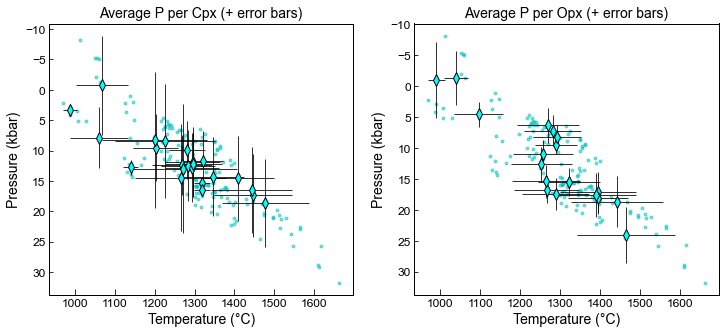

In [12]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5)) # This sets up 2 subplots

# Subplot1
# This plots all possible matches as small cyan dots, with a transparency of 0.5 underneath
ax1.plot(All_matches_HighTKdFilt['T_K_calc']-273.15,  All_matches_HighTKdFilt['P_kbar_calc'], '.c', alpha=0.5)
# This plots the average pressure per Cpx, with an error bar showing the 1 sigma on each Cpx. 
ax1.errorbar(Av_Cpxs_HighTKdFilt['Mean_T_K_calc']-273.15,  Av_Cpxs_HighTKdFilt['Mean_P_kbar_calc'],
             xerr=Av_Cpxs_HighTKdFilt['Std_T_K_calc'], yerr=Av_Cpxs_HighTKdFilt['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=8, mec='k')

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Pressure (kbar)')
ax1.set_title('Average P per Cpx (+ error bars)')
# Subplot2

# This plots all possible matches as small cyan dots, with a transparency of 0.5 underneath
ax2.plot(All_matches_HighTKdFilt['T_K_calc']-273.15,  All_matches_HighTKdFilt['P_kbar_calc'], '.c', alpha=0.5)
# This plots the average pressure per Opx, with an error bar showing the 1 sigma on each Opx. 
ax2.errorbar(Av_Opxs_HighTKdFilt['Mean_T_K_calc']-273.15,  Av_Opxs_HighTKdFilt['Mean_P_kbar_calc'],
             xerr=Av_Opxs_HighTKdFilt['Std_T_K_calc'], yerr=Av_Opxs_HighTKdFilt['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=8, mec='k')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('Pressure (kbar)')
ax2.set_title('Average P per Opx (+ error bars)')

ax1.invert_yaxis()
ax2.invert_yaxis()

fig.savefig('HighTMatches.png', dpi=200)

### Second plot option - Lets just plot all matches, with a big star for the average pressure and temperature

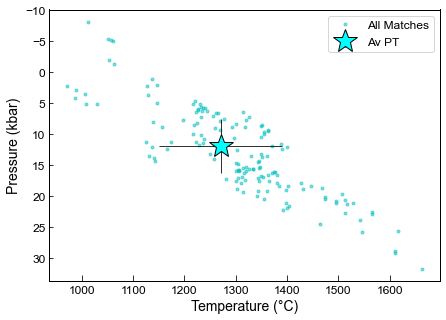

In [13]:
fig, ((ax1)) = plt.subplots(1, figsize=(7, 5)) # This sets up 2 subplots

# Subplot1
# This plots all possible matches as small cyan dots, with a transparency of 0.5 underneath
ax1.plot(All_matches_HighTKdFilt['T_K_calc']-273.15,  All_matches_HighTKdFilt['P_kbar_calc'], '.c', alpha=0.5, label='All Matches')
# This plots the average pressure per Cpx, with an error bar showing the 1 sigma on each Cpx. 
ax1.errorbar(np.mean(Av_Cpxs_HighTKdFilt['Mean_T_K_calc'])-273.15,  np.mean(Av_Cpxs_HighTKdFilt['Mean_P_kbar_calc']),
             xerr=np.std(Av_Cpxs_HighTKdFilt['Mean_T_K_calc']), yerr=np.std(Av_Cpxs_HighTKdFilt['Mean_P_kbar_calc']),
             fmt='*', ecolor='k', elinewidth=0.8, mfc='cyan', ms=25, mec='k', label='Av PT')

ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Pressure (kbar)')
ax1.invert_yaxis()
ax1.legend()

fig.savefig('HighTMatches_Overall_Average.png', dpi=200)

## 1c - User-selected KdMatch and Kd_Err
- Manually specify Kd Match and error window, e.g., here only keep matches with Kd=1 +- 0.08

In [14]:
MatchOut_KdFilt2=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", equationT="T_Put2008_eq36", Kd_Match=1, Kd_Err=0.08)
# These two lines split the dictionary into two dataframes
Av_Cpxs_KdFilt2=MatchOut_KdFilt2['Av_PTs_perCPX']
All_matches_KdFilt2=MatchOut_KdFilt2['All_PTs']
All_matches_KdFilt2.head()

Considering 437 Opx-Cpx pairs, be patient if this is >>1 million!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,T_K_calc,P_kbar_calc,Equation Choice (T),Equation Choice (P),SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Si_Opx_cat_6ox,Mg_Opx_cat_6ox,Fet_Opx_cat_6ox,Ca_Opx_cat_6ox,Al_Opx_cat_6ox,Na_Opx_cat_6ox,K_Opx_cat_6ox,Mn_Opx_cat_6ox,Ti_Opx_cat_6ox,Cr_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,En_Simple_MgFeCa_Opx,Fs_Simple_MgFeCa_Opx,Wo_Simple_MgFeCa_Opx,Cation_Sum_Opx,Ca_CaMgFe,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Delta_Kd_Fe_Mg_Cpx_Opx
1,your_opx_sample_name_2,your_cpx_sample_name_1,1.065157,1403.925666,13.493433,T_Put2008_eq36,P_Put2008_eq39,52.70,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,0.823640,0.133270,0.043089,4.012245,0.043089,0.442596,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.043089,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.065157
2,your_opx_sample_name_3,your_cpx_sample_name_1,1.019441,1397.201768,11.274875,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,0.814732,0.137741,0.047527,4.008433,0.047527,0.442596,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.047527,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.019441
4,your_opx_sample_name_5,your_cpx_sample_name_1,0.932864,1275.837500,5.280842,T_Put2008_eq36,P_Put2008_eq39,56.32,0.13,1.41,10.17,0.26,30.88,1.05,0.02,0.0,0.16,1.971271,1.611274,0.297687,0.039377,0.058165,0.001357,0.0,0.007708,0.003423,0.004427,0.0,0.028729,0.029435,1.974693,0.826999,0.152790,0.020211,3.994689,0.020211,0.442596,0.001357,0.003423,0.004427,0.023651,0.039377,0.925110,0.777706,0.033103,0.844054,4.0,52.3,0.70,3.00,5.10,0.11,16.6,21.5,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.020211,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.067136
21,your_opx_sample_name_3,your_cpx_sample_name_2,1.037319,1577.779664,14.800255,T_Put2008_eq36,P_Put2008_eq39,53.20,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,0.814732,0.137741,0.047527,4.008433,0.047527,0.250554,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,51.7,0.28,8.38,6.69,0.15,21.4,11.7,0.64,0.0,0.05,1.830350,1.129

## 1d - Calculations at a constant temperature
- Say you want to calculate all matches, but you think you know temperatures better from independent constraints (E.g., Fe-Ti oxides). Thus, you enter a constant T (here 1300 K), and an equation for P

In [16]:
MatchOut_HighTKdFilt=pt.calculate_cpx_opx_press_temp_matching(opx_comps=Opxs2, cpx_comps=Cpxs2,  
                    equationP="P_Put2008_eq39", T=1300, Kd_Match="HighTemp")
# These two lines split the dictionary into two dataframes
Av_Cpxs_HighTKdFilt=MatchOut_HighTKdFilt['Av_PTs_perCPX']
All_matches_HighTKdFilt=MatchOut_HighTKdFilt['All_PTs']
All_matches_HighTKdFilt

Considering 437 Opx-Cpx pairs, be patient if this is >>1 million!
Done!


,Sample_ID_Opx,Sample_ID_Cpx,Kd_Fe_Mg_Cpx_Opx,T_K_input,P_kbar_calc,SiO2_Opx,Equation Choice (P),TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx,Si_Opx_cat_6ox,Mg_Opx_cat_6ox,Fet_Opx_cat_6ox,Ca_Opx_cat_6ox,Al_Opx_cat_6ox,Na_Opx_cat_6ox,K_Opx_cat_6ox,Mn_Opx_cat_6ox,Ti_Opx_cat_6ox,Cr_Opx_cat_6ox,oxy_renorm_factor_opx,Al_IV_Opx_cat_6ox,Al_VI_Opx_cat_6ox,Si_Ti_Opx_cat_6ox,En_Simple_MgFeCa_Opx,Fs_Simple_MgFeCa_Opx,Wo_Simple_MgFeCa_Opx,Cation_Sum_Opx,Ca_CaMgFe,Ca_CaMgFe,NaAlSi2O6,FmTiAlSiO6,CrAl2SiO6,FmAl2SiO6,CaFmSi2O6,Fm2Si2O6,En_Opx,Di_Opx,Mgno_OPX,ID_OPX,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Delta_Kd_Fe_Mg_Cpx_Opx
1,your_opx_sample_name_2,your_cpx_sample_name_1,1.065157,1300,8.816778,52.70,P_Put2008_eq39,0.15,8.10,8.48,0.14,29.40,2.14,0.14,0.0,0.00,1.823396,1.516444,0.245370,0.079334,0.330303,0.009392,0.0,0.004103,0.003904,0.000000,0.0,0.176604,0.153699,1.827300,0.823640,0.133270,0.043089,4.012245,0.043089,0.442596,0.009392,0.003904,0.000000,0.144307,0.079334,0.769186,0.660522,0.068126,0.860725,1.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.043089,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.024843
2,your_opx_sample_name_3,your_cpx_sample_name_1,1.019441,1300,6.900795,53.20,P_Put2008_eq39,0.20,7.40,8.80,0.13,29.20,2.37,0.14,0.0,0.02,1.839965,1.505530,0.254529,0.087825,0.301638,0.009388,0.0,0.003808,0.005203,0.000547,0.0,0.160035,0.141603,1.845168,0.814732,0.137741,0.047527,4.008433,0.047527,0.442596,0.009388,0.005203,0.000547,0.131669,0.087825,0.769585,0.656871,0.074962,0.855382,2.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.047527,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.070559
17,your_opx_sample_name_18,your_cpx_sample_name_1,1.145797,1300,8.768788,52.60,P_Put2008_eq39,0.28,8.60,7.91,0.12,29.50,2.11,0.15,0.0,0.00,1.814573,1.517118,0.228203,0.077991,0.349659,0.010033,0.0,0.003506,0.007266,0.000000,0.0,0.185427,0.164232,1.821839,0.832067,0.125158,0.042774,4.008348,0.042774,0.442596,0.010033,0.007266,0.000000,0.154199,0.077991,0.754686,0.654694,0.067658,0.869245,17.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0.475459,0.081945,0.442596,4.007242,0.042774,0.442596,0.014485,0.141454,0.092887,0.008383,0.122977,0.852984,0.023393,0.0,0.018064,0.034876,0.780925,0.139899,0.780925,0.663987,0.014485,0.141454,0.0,0.055797
18,your_opx_sample_name_19,your_cpx_sample_name_1,1.101575,1300,6.182006,52.95,P_Put2008_eq39,0.52,7.43,8.01,0.00,28.72,1.93,0.27,0.0,0.16,1.848702,1.494838,0.233878,0.072199,0.305736,0.018277,0.0,0.000000,0.013656,0.004416,0.0,0.151298,0.154439,1.862359,0.830044,0.129866,0.040090,3.991704,0.040090,0.442596,0.018277,0.013656,0.004416,0.131745,0.072199,0.755558,0.653338,0.062431,0.864706,18.0,52.30,0.70,3.00,5.10,0.11,16.60,21.50,0.33,0.0,0.58,1.912184,0.904784,0.155939,0.842247,0.129273,0.023393,0.0,0.003406,0.019251,0.016765,0.0,0.087816,0.041457,0

### Lets plot some results
-Here, we show a histogram for al matches, for the high T Kd filter, and the manual Kd filter. 

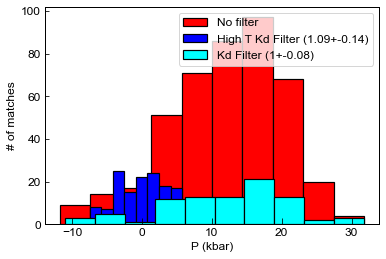

In [17]:
plt.hist(All_matches['P_kbar_calc'], facecolor='r', edgecolor='black', 
         linewidth=1.2, label='No filter')
plt.hist(All_matches_HighTKdFilt['P_kbar_calc'], facecolor='b', edgecolor='black', 
         linewidth=1.2, label='High T Kd Filter (1.09+-0.14)')
plt.hist(All_matches_KdFilt2['P_kbar_calc'], facecolor='cyan', edgecolor='black', 
         linewidth=1.2, label='Kd Filter (1+-0.08)')

plt.xlabel('P (kbar)', fontsize=12)
plt.ylabel('# of matches', fontsize=12)
plt.legend()

## Lets save the "all matches" dataframe to excel... 

In [18]:
All_matches.to_excel('AllMatches.xlsx')

## Similary, here's how we save the high T matches to excel...

In [19]:
All_matches_HighTKdFilt.to_excel('HighTMatches.xlsx')